this script plots the funding profile of countries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [52]:
pubs_path="../../data/nf_folder/Data/DerivedData/CleanedRawData/pub.pkl"
region_path="../../data/nf_folder/Data/AdditionalData/cntry_region.xlsx"

In [3]:
pub_df=pd.read_pickle(pubs_path)

In [4]:
def ftype(funded,cofund):
    label='null'
    if funded==0:
        label='not-fund'
    elif funded==1 and cofund==0:
        label='single'
    elif cofund==1:
        label='cofund'
    return label
pub_df['ftype']=pub_df[['funded','cofund']].apply(lambda x:ftype(x.funded,x.cofund),axis=1)

In [5]:
pub_df.head()

,id,year,dis,type,author,funder,author_distinct,funder_distinct,funded,IntCol,cofund,ftype
0,60694041,2017,9,1,"[Canada, United States]","[United States, United States]","[United States, Canada]",[United States],1,1,0,single
1,48573156,2012,89,1,[France],Not-Funded,[France],Not-Funded,0,0,0,not-fund
2,55323671,2015,89,1,"[France, Chile]","[Chile, Chile, Chile, Chile, Chile]","[Chile, France]",[Chile],1,1,0,single
3,57633115,2016,31,1,"[Switzerland, United States]",[Switzerland],"[Switzerland, United States]",[Switzerland],1,1,0,single
4,64831413,2018,99,1,[China],"[China, China, China, China, China, China]",[China],[China],1,0,0,single


In [11]:
cntry_df=pub_df[['author_distinct','funder_distinct','IntCol']]

In [13]:
cntry_df=cntry_df.explode(column='author_distinct')

In [17]:
cntry_df['fund']=cntry_df[['author_distinct','funder_distinct']].apply(
    lambda x: 1 if x.author_distinct in x.funder_distinct else 0,axis=1)

In [35]:
cntry_df.head()

,author_distinct,funder_distinct,IntCol,fund
0,United States,[United States],1,1
0,Canada,[United States],1,0
1,France,Not-Funded,0,0
2,Chile,[Chile],1,1
2,France,[Chile],1,0


In [36]:
df1=cntry_df.groupby(['author_distinct','IntCol']).size().reset_index(name='value')
df1=df1.pivot_table(index='author_distinct',columns='IntCol',values='value')
df1 = df1.div(df1.sum(axis=1), axis=0)
df1 = df1.rename(columns={0:'dome',1:'intcol'})
df2=cntry_df.groupby(['author_distinct','fund']).size().reset_index(name='value')
df2=df2.pivot_table(index='author_distinct',columns='fund',values='value')
df2 = df2.div(df2.sum(axis=1), axis=0)
df2=df2.rename(columns={0:'notfund',1:'fund'})

In [37]:
df2.head()

fund,notfund,fund
author_distinct,,
Afghanistan,0.997494,0.002506
Albania,0.988764,0.011236
Algeria,0.916404,0.083596
Andorra,0.898551,0.101449
Angola,0.919087,0.080913


In [38]:
df1.head()

IntCol,dome,intcol
author_distinct,,
Afghanistan,0.070175,0.929825
Albania,0.285815,0.714185
Algeria,0.406483,0.593517
Andorra,0.014493,0.985507
Angola,0.031120,0.968880


In [48]:
pubcnt = cntry_df.groupby('author_distinct').size().reset_index(name='pubcnt')

In [49]:
pubcnt.head()

,author_distinct,pubcnt
0,Afghanistan,399
1,Albania,1424
2,Algeria,25049
3,Andorra,69
4,Angola,482


In [44]:
meta = df1.merge(df2,left_index=True,right_index=True)
meta.head()

,dome,intcol,notfund,fund
author_distinct,,,,
Afghanistan,0.070175,0.929825,0.997494,0.002506
Albania,0.285815,0.714185,0.988764,0.011236
Algeria,0.406483,0.593517,0.916404,0.083596
Andorra,0.014493,0.985507,0.898551,0.101449
Angola,0.031120,0.968880,0.919087,0.080913


In [50]:
meta = meta.merge(pubcnt,left_index=True,right_on='author_distinct')

In [51]:
meta.head()

,dome,intcol,notfund,fund,author_distinct,pubcnt
0,0.070175,0.929825,0.997494,0.002506,Afghanistan,399
1,0.285815,0.714185,0.988764,0.011236,Albania,1424
2,0.406483,0.593517,0.916404,0.083596,Algeria,25049
3,0.014493,0.985507,0.898551,0.101449,Andorra,69
4,0.031120,0.968880,0.919087,0.080913,Angola,482


In [54]:
region=pd.read_excel(region_path)
region.head()

,cntry,region1,eulabel,region
0,Afghanistan,Asia,NaN,Asia
1,Albania,Europe,NaN,Other Europe
2,Algeria,Africa,NaN,Africa
3,Andorra,Europe,NaN,Other Europe
4,Angola,Africa,NaN,Africa


In [55]:
meta=meta.merge(region[['cntry','region']],left_on='author_distinct',right_on='cntry')

In [57]:
meta['pubcnt']=np.log10(meta['pubcnt'])

In [58]:
meta.head()

,dome,intcol,notfund,fund,author_distinct,pubcnt,cntry,region
0,0.070175,0.929825,0.997494,0.002506,Afghanistan,2.600973,Afghanistan,Asia
1,0.285815,0.714185,0.988764,0.011236,Albania,3.153510,Albania,Other Europe
2,0.406483,0.593517,0.916404,0.083596,Algeria,4.398790,Algeria,Africa
3,0.014493,0.985507,0.898551,0.101449,Andorra,1.838849,Andorra,Other Europe
4,0.031120,0.968880,0.919087,0.080913,Angola,2.683047,Angola,Africa


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

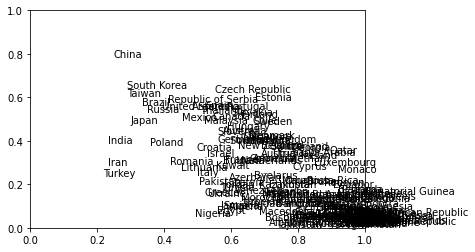

In [70]:
text=[]
for ind, row in meta.iterrows():
    s=row['author_distinct']
    x=row['intcol']
    y=row['fund']
    text.append(plt.text(x,y,s))

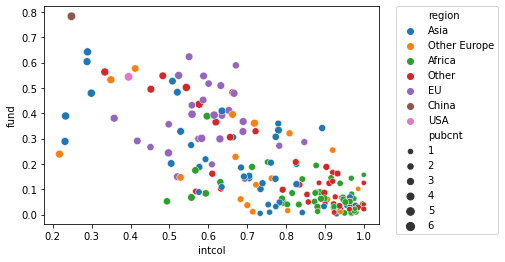

In [71]:
sns.scatterplot(x='intcol',y='fund',data=meta,size='pubcnt',hue='region')
adjust_text(text)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [6]:
cntry_df=pub_df[['author_distinct','ftype']].explode(column='author_distinct')

In [7]:
cntry_df = cntry_df.groupby(['author_distinct','ftype']).size().reset_index(name='count')

In [8]:
cntry_df = cntry_df.pivot_table(index='author_distinct',columns='ftype',values='count')

In [9]:
cntry_df = cntry_df.div(cntry_df.sum(axis=1), axis=0)

In [10]:
cntry_df.head()

ftype,cofund,not-fund,single
author_distinct,,,
Afghanistan,0.090226,0.551378,0.358396
Albania,0.089888,0.742275,0.167837
Algeria,0.060442,0.772406,0.167152
Andorra,0.115942,0.492754,0.391304
Angola,0.234440,0.400415,0.365145


In [28]:
cntry_df.sort_values(by='single',ascending=False).reset_index().to_csv("fund_profile.csv",index=False)